# Метрики качества бинарной классификации

## Теоретическая часть

__Вспомнить из лекций:__
* Как вычисляются следующие метрики качества: **точность, полнота, F-мера, LogLoss, AUC-ROC, AUC-RPC**?

Большинство алгоритмов бинарной классификации работают следующим образом: они предсказывают для объекта  $x$ вещественное число $b(x)$, а затем сравнивают его с порогом $T$: 
- если $b(x) < T$, то предсказывается класс -1, 
- иначе предсказывается класс +1. 

Это можно записать в терминах функции **sign** (знак):
$$a(x) = sign(b(x)-T)$$

Метрики качества бинарной классификации можно разделить на две группы: 

оценивают 
- бинарные предсказания $a(x)$ (класс -1 и +1), 
- вещественные предсказания $b(x)$. 

Некоторые метрики последней группы варьируют порог, и оценивают качество бинарных предсказаний при различных порогах. Это полезно, чтобы "отделить" качество работы алгоритма от качества выбора конкретного порога. 

### Вопрос: 
Какие из рассмотренных в лекциях метрик относятся к каждой группе?

### Ответ:

* Бинарные — точность, полнота, F-мера
* Вещественные — LogLoss, AUC-ROC, AUC-RPC

### Задача 1
Вычислить (вручную) **accuracy, точность, полноту** и  **F-меру** для следующих векторов предсказаний и правильных ответов:

|                               |    |    |    |    |    |    |    |
|-------------------------------|----|----|----|----|----|----|----|
| Правильный ответ (из данных) | +1 | -1 | +1 | +1 | -1 | +1 | -1 |
| Предсказание                  | -1 | +1 | +1 | +1 | -1 | -1 | -1 |



### Решение:

![image](https://i.ibb.co/m5HWcrh/tpfptnfn.png)

##### Дано: 
* $TP = 2$
* $FP = 1$
* $TN = 2$
* $FN = 2$

#### Поэтому:
* **Аккуратность**: $\;\;\;\;\;\;$ $accuracy = \frac{TP + TN}{TP + TN + FP + TN} \approx 0.57$

<br>

* **Точность**: $\;\;\;\;\;\;\;\;\;\;\;$ $precision = \frac{TP}{TP + FP} = 0.\overline{6}$

<br>

* **Полнота**: $\;\;\;\;\;\;\;\;\;\;\;\;$ $recall = \frac{TP}{TP + FN} = 0.5$

<br>

* **F-мера**: $\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ $F_{score} = (1 + \beta^2) \times \frac{precision \times recall}{\beta^2 \times precision + recall} = \frac{2 \times precision \times recall}{precision + recall} \approx 0.57$

In [ ]:
tp = 2
fp = 1
tn = 2
fn = 2

accuracy = (tp + tn) / (fp + fn + tp + tn)
print(f'Accuracy: {round(accuracy,2)}')

precision = tp / (fp + tp)
print(f'Precision: {round(precision,2)}')

recall = tp / (tp + fn)
print(f'Recall: {round(recall,2)}')

fscore = 2 * precision * recall / (precision + recall)
print(f'F-score: {round(fscore,2)}')

Accuracy: 0.57
Precision: 0.67
Recall: 0.5
F-score: 0.57


### Задача 2
Рассмотрим алгоритм вида $$a(x) = sign(b(x)-T).$$ Пусть для любого объекта $x$ выполнено $-10 < b(x) < 10$. Какова будет точность и полнота алгоритма, если положить $T=-15$? $T=15$? 


### Решение:

$T = -15  \Rightarrow  b(x) > T $

$a(x) = sign(b(x) - T) = 1$

$\Rightarrow TN = 0, FN = 0 \Rightarrow $

$recall = \frac{TP}{TP} = 1, precision = ?$

<br><br>

$T = 15 \Rightarrow  b(x) < T $

$a(x) = sign(b(x) - T) = -1$

$\Rightarrow TP = 0, FP = 0 \Rightarrow $

$recall = 0, precision = 0$

### Задача 3

Найти (вручную) точки, необходимые для пострения ROC-кривой для следующих векторов предсказаний и правильных ответов:

|                              |    |    |    |    |    |    |    |
|------------------------------|----|----|----|----|----|----|----|
| Правильный ответ (из данных) | -1 | +1 | +1 | -1 | +1 | -1 | -1 |
| Предсказание $b(x)$       | 1  | 15 | -1 | 7  | 3  | -8 | -5 |

__Указание:__

Следует сначала отсортировать объекты по возрастанию вещественных предсказаний $b(x)$. 

### Решение:

$$FPR = \frac{FP}{FP + TN}$$

$$TPR = \frac{TP}{TP + FN}$$

Отсортируем объекты:

|                              |    |    |    |    |    |    |    |
|------------------------------|----|----|----|----|----|----|----|
| Правильный ответ (из данных) | -1 | -1 | +1 | -1 | +1 | -1 | +1 |
| Предсказание $b(x)$       | -8  | -5 | -1 | 1 | 3 | 7 | 15 |

Теперь переберем несколько значений порога $T$:

**T = -3**

|                              |    |    |    |    |    |    |    |
|------------------------------|----|----|----|----|----|----|----|
| Правильный ответ (из данных) | -1 | -1 | +1 | -1 | +1 | -1 | +1 |
| Предсказание $b(x)$          | -8  | -5 | -1 | 1 | 3 | 7 | 15 |
| Результат $a(x)$             | -1 | -1 | +1 | +1 | +1 | +1 | +1 |

$FPR = \frac{2}{2 + 2} = 0.5$

$TPR = \frac{3}{3 + 0} = 1$

Найденная точка $(0.5, 1)$

**T = 0**

|                              |    |    |    |    |    |    |    |
|------------------------------|----|----|----|----|----|----|----|
| Правильный ответ (из данных) | -1 | -1 | +1 | -1 | +1 | -1 | +1 |
| Предсказание $b(x)$          | -8  | -5 | -1 | 1 | 3 | 7 | 15 |
| Результат $a(x)$             | -1 | -1 | +1 | +1 | +1 | +1 | +1 |

$FPR = \frac{2}{2 + 2} = 0.5$

$TPR = \frac{2}{2 + 0} = 1$

Найденная точка $(0.5, 1)$

**T = 6**

|                              |    |    |    |    |    |    |    |
|------------------------------|----|----|----|----|----|----|----|
| Правильный ответ (из данных) | -1 | -1 | +1 | -1 | +1 | -1 | +1 |
| Предсказание $b(x)$       | -8  | -5 | -1 | 1 | 3 | 7 | 15 |
| Результат $a(x)$ | -1 | -1 | -1 | -1 | -1 | +1 | +1 |

$FPR = \frac{1}{1 + 3} = 0.25$

$FPR = \frac{1}{1 + 2} = 1/3$

Найденная точка $(0.25, 1/3)$

### Задача 4

Какое значение AUC-ROC будет у алгоритма $b(x)$, который на каждом объекте возвращает случайное вещественное число из отрезка [-2, 2] (равномерное распределение)?

* **Решение**: $0.5$, так как решение случайно (не зависит от х), и равномерно распределено.

У алгоритма, который для всех объектов класса -1 возвращает отрицательное число, а для всех объектов класса +1 - положительное число?

* **Решение**: $1$, так как алгоритм максимально точный, нет ложных предсказаний

### Задача 5

Пусть для алгоритма $b(x)$ значение AUC-ROC равно 0.2. Каким будет AUC-ROC алгоритма $-b(x)$?


### Решение:

* $0.8$, так как это обратный алгоритм

## Практическая часть

Функции для вычисления метрик в **sklearn** 

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

Сгенерируем два бинарных вектора длины 100 (число объектов):

In [ ]:
import numpy as np

In [ ]:
n = 100
y_true = np.random.randint(2, size=n)
y_pred = np.random.randint(2, size=n)

Вычислим метрики качества бинарных предсказаний для случайных ответов (соответствует алгоритму, не выделяющему никаких закономерностей в данных):

In [ ]:
precision_score(y_true, y_pred), recall_score(y_true, y_pred), f1_score(y_true, y_pred)

(0.5263157894736842, 0.5660377358490566, 0.5454545454545455)

In [ ]:
accuracy_score(y_true, y_pred)

0.5

Все метрики около 0.5 (примерная доля объектов положительного класса в выборке).

Вычислим метрики для случая, когда все ответы правильные:

In [ ]:
precision_score(y_true, y_true), recall_score(y_true, y_true), f1_score(y_true, y_true)

(1.0, 1.0, 1.0)

In [ ]:
accuracy_score(y_true, y_true)

1.0

Как и ожидается, все метрики равны 1.

Сгенерируем вектор случайных вещественных предсказаний:

In [ ]:
b_pred = np.random.rand(n)

Вычислим roc_auc:

In [ ]:
roc_auc_score(y_true, b_pred)

0.4877559213167402

Как и ожидается, значение ROC-AUC около 0.5.

### Задание
Реализовать построение ROC-кривой, используя данные задачи 3.

Сопоставить с результатами, полученными при решении задачи 3.

In [ ]:
y_true = np.array([-1, -1, 1, -1, 1, -1, 1])
b_pred = np.array([-8, -5, -1, 1, 3, 7, 15])

In [ ]:
def is_tp(a_x, y):
    return a_x == 1 and y == 1
def is_fp(a_x, y):
    return a_x == 1 and y == -1
def is_fn(a_x, y):
    return a_x == -1 and y == 1
def is_tn(a_x, y):
    return a_x == -1 and y == -1

fprs = []
tprs = []

def fpr(fp, tn):
    return fp / (fp + tn)

def tpr(tp, fn):
    return tp / (tp + fn)


for t in range(-9, 16):
    y_pred = [(-1 if b < t else 1) for b in b_pred]
    tp = np.sum([is_tp(y_pred[i], y_true[i]) for i in range(len(y_pred))])
    fp = np.sum([is_fp(y_pred[i], y_true[i]) for i in range(len(y_pred))])
    fn = np.sum([is_fn(y_pred[i], y_true[i]) for i in range(len(y_pred))])
    tn = np.sum([is_tn(y_pred[i], y_true[i]) for i in range(len(y_pred))])
    # print(f'TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')
    fprs.append(fpr(fp, tn))
    tprs.append(tpr(tp, fn))

In [ ]:
print(fprs)

[1.0, 1.0, 0.75, 0.75, 0.75, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
print(tprs)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333]


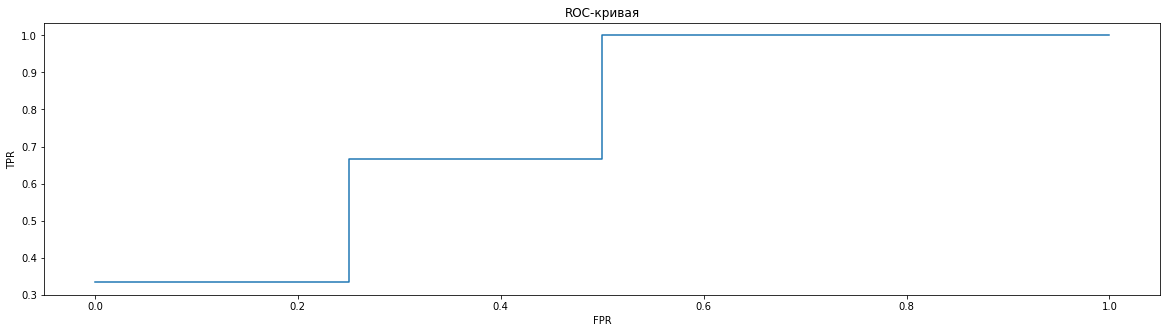

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot()
plt.plot(fprs, tprs)
plt.title('ROC-кривая')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show();